<a href="https://colab.research.google.com/github/2403a52030-sketch/NLP-LAB/blob/main/NLP_LAB_03_2403a52030.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import nltk
import spacy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Download NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
essay_text = """
Artificial Intelligence plays a crucial role in modern healthcare systems.
Researchers analyze medical data to improve diagnosis and treatment efficiency.
Machine learning algorithms support clinical decision making and enhance patient outcomes.
"""


In [ ]:
print("Academic Essay Text:\n")
print(essay_text)


Academic Essay Text:


Artificial Intelligence plays a crucial role in modern healthcare systems.
Researchers analyze medical data to improve diagnosis and treatment efficiency.
Machine learning algorithms support clinical decision making and enhance patient outcomes.



In [ ]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt_tab', quiet=True)

tokens = word_tokenize(essay_text)
print("Tokens:\n", tokens)

Tokens:
 ['Artificial', 'Intelligence', 'plays', 'a', 'crucial', 'role', 'in', 'modern', 'healthcare', 'systems', '.', 'Researchers', 'analyze', 'medical', 'data', 'to', 'improve', 'diagnosis', 'and', 'treatment', 'efficiency', '.', 'Machine', 'learning', 'algorithms', 'support', 'clinical', 'decision', 'making', 'and', 'enhance', 'patient', 'outcomes', '.']


In [ ]:
nltk.download('averaged_perceptron_tagger_eng', quiet=True)
nltk_pos_tags = nltk.pos_tag(tokens)

print("NLTK POS Tags:\n")
for word, tag in nltk_pos_tags:
    print(word, ":", tag)

NLTK POS Tags:

Artificial : JJ
Intelligence : NNP
plays : VBZ
a : DT
crucial : JJ
role : NN
in : IN
modern : JJ
healthcare : NN
systems : NNS
. : .
Researchers : NNP
analyze : VBP
medical : JJ
data : NNS
to : TO
improve : VB
diagnosis : NN
and : CC
treatment : NN
efficiency : NN
. : .
Machine : NNP
learning : VBG
algorithms : JJ
support : NN
clinical : JJ
decision : NN
making : NN
and : CC
enhance : VB
patient : JJ
outcomes : NNS
. : .


In [ ]:
nlp = spacy.load("en_core_web_sm")
doc = nlp(essay_text)

print("spaCy POS Tags:\n")
for token in doc:
    print(token.text, ":", token.pos_)


spaCy POS Tags:


 : SPACE
Artificial : PROPN
Intelligence : PROPN
plays : VERB
a : DET
crucial : ADJ
role : NOUN
in : ADP
modern : ADJ
healthcare : NOUN
systems : NOUN
. : PUNCT

 : SPACE
Researchers : NOUN
analyze : VERB
medical : ADJ
data : NOUN
to : PART
improve : VERB
diagnosis : NOUN
and : CCONJ
treatment : NOUN
efficiency : NOUN
. : PUNCT

 : SPACE
Machine : NOUN
learning : NOUN
algorithms : AUX
support : VERB
clinical : ADJ
decision : NOUN
making : NOUN
and : CCONJ
enhance : VERB
patient : ADJ
outcomes : NOUN
. : PUNCT

 : SPACE


In [ ]:
nltk_tags = set(tag for _, tag in nltk_pos_tags)
spacy_tags = set(token.pos_ for token in doc)

print("NLTK Tag Set:", nltk_tags)
print("spaCy Universal Tag Set:", spacy_tags)


NLTK Tag Set: {'VBP', 'NNP', '.', 'VBZ', 'DT', 'IN', 'NNS', 'VB', 'CC', 'NN', 'JJ', 'TO', 'VBG'}
spaCy Universal Tag Set: {'VERB', 'ADJ', 'PART', 'DET', 'PROPN', 'SPACE', 'PUNCT', 'AUX', 'CCONJ', 'ADP', 'NOUN'}


In [ ]:
nouns = [token.text.lower() for token in doc if token.pos_ == "NOUN"]
verbs = [token.text.lower() for token in doc if token.pos_ == "VERB"]

print("Extracted Nouns (Concepts):", nouns)
print("Extracted Verbs (Arguments):", verbs)


Extracted Nouns (Concepts): ['role', 'healthcare', 'systems', 'researchers', 'data', 'diagnosis', 'treatment', 'efficiency', 'machine', 'learning', 'decision', 'making', 'outcomes']
Extracted Verbs (Arguments): ['plays', 'analyze', 'improve', 'support', 'enhance']


In [ ]:
noun_freq = Counter(nouns)
verb_freq = Counter(verbs)

print("Noun Frequencies:", noun_freq)
print("Verb Frequencies:", verb_freq)


Noun Frequencies: Counter({'role': 1, 'healthcare': 1, 'systems': 1, 'researchers': 1, 'data': 1, 'diagnosis': 1, 'treatment': 1, 'efficiency': 1, 'machine': 1, 'learning': 1, 'decision': 1, 'making': 1, 'outcomes': 1})
Verb Frequencies: Counter({'plays': 1, 'analyze': 1, 'improve': 1, 'support': 1, 'enhance': 1})


In [ ]:


noun_df = pd.DataFrame(noun_freq.items(), columns=["Noun", "Frequency"])
verb_df = pd.DataFrame(verb_freq.items(), columns=["Verb", "Frequency"])

noun_df, verb_df


(           Noun  Frequency
 0          role          1
 1    healthcare          1
 2       systems          1
 3   researchers          1
 4          data          1
 5     diagnosis          1
 6     treatment          1
 7    efficiency          1
 8       machine          1
 9      learning          1
 10     decision          1
 11       making          1
 12     outcomes          1,
       Verb  Frequency
 0    plays          1
 1  analyze          1
 2  improve          1
 3  support          1
 4  enhance          1)

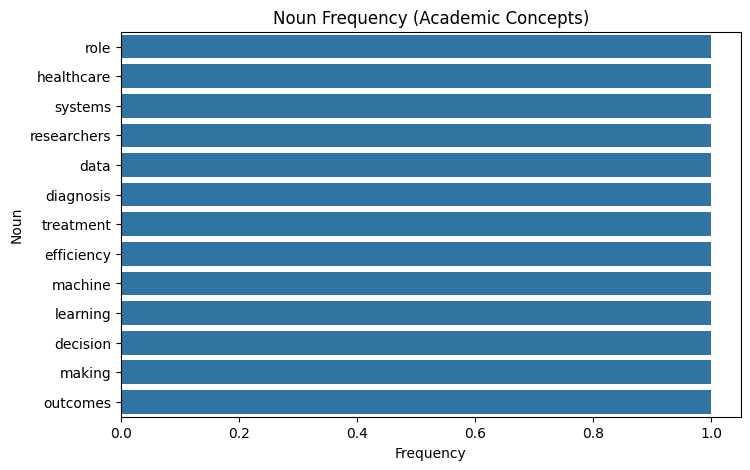

In [ ]:
#noun frequency chart
plt.figure(figsize=(8,5))
sns.barplot(x="Frequency", y="Noun", data=noun_df)
plt.title("Noun Frequency (Academic Concepts)")
plt.show()


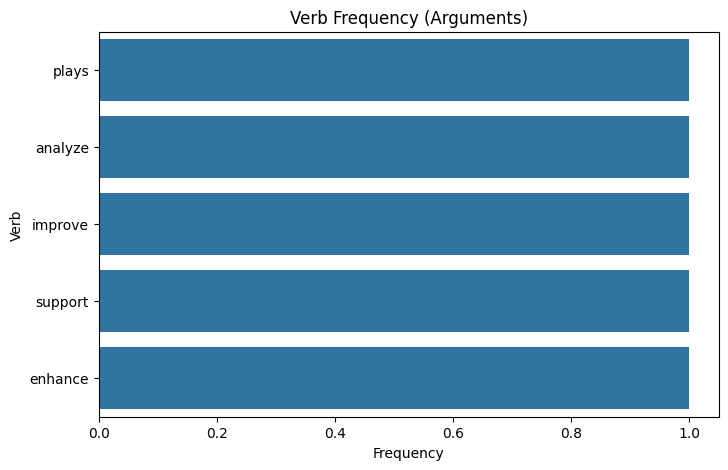

In [ ]:
#verb frequency chart
plt.figure(figsize=(8,5))
sns.barplot(x="Frequency", y="Verb", data=verb_df)
plt.title("Verb Frequency (Arguments)")
plt.show()
